## Loading CSRNet checkpoint for apple counting and detection

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from PIL import Image
from torchvision import transforms
from model import CSRNet  # defined in model.py

In [8]:
# Initialize the model
model = CSRNet()

# Load the checkpoint
checkpoint_path = '0checkpoint.pth.tar'
checkpoint = torch.load(checkpoint_path, map_location=torch.device('cpu'))

# Load the model state_dict from the checkpoint
model.load_state_dict(checkpoint['state_dict'])

# Set the model to evaluation mode
model.eval()

C:\Users\calci\AppData\Local\Temp\ipykernel_9552\1860682976.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=torch.d

CSRNet(
  (frontend): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilatio

In [19]:
# Image to test with
img_path = r'D:\MASTERS\Year 2\Machine Vision\Assignment\KFuji\preprocessed data\images\BD12_sup_201711_069_01_RGBhr.jpg'
img = Image.open(img_path)

# Save the original image for display before any transformations
original_img_for_display = img.copy()

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Preprocess the image
img_tensor = transform(img).unsqueeze(0)  # Add batch dimension

In [20]:
with torch.no_grad():  # Disable gradient calculations
    density_map = model(img_tensor)

# Convert the output to a NumPy array for further processing
density_map = density_map.squeeze().cpu().numpy()

In [22]:
apple_count = density_map.sum()
print(f"Estimated number of apples: {apple_count}")

Estimated number of apples: 3.8573882579803467


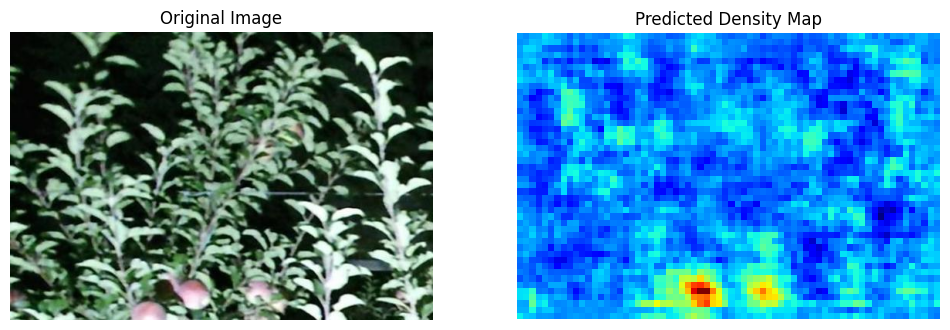

In [24]:
# Create a subplot to show both the image and density map side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Show the original image (without any preprocessing or tensor conversion)
axs[0].imshow(original_img_for_display)
axs[0].set_title("Original Image")
axs[0].axis('off')  # Hide axis for a cleaner look

# Show the density map
im = axs[1].imshow(density_map, cmap='jet')
axs[1].set_title("Predicted Density Map")
axs[1].axis('off')  # Hide axis for a cleaner look

# Display the figure
plt.show()